In [1]:
%matplotlib inline
#https://github.com/north0n-FI/K-means-clustering-on-US-crime-data/blob/master/kmeans_US_crime_data-FINAL.ipynb
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\DWIKI\AppData\Local\Temp/ipykernel_4568/128740845.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float, array


In [4]:
df = pd.read_excel("kemiskinan.xlsx", sheet_name=None)
indonesia = df['INDONESIA']
indonesia

,Kota/Kabupaten,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,Simeulue,18.98,6.37,65.35,28.28,99.62,100.00,47.67,46.89,5.44,65.47
1,Aceh Singkil,20.36,15.53,56.19,28.27,99.45,96.96,53.31,24.57,22.12,68.71
2,Aceh Selatan,13.18,11.55,65.60,22.84,99.97,100.00,50.63,31.94,17.44,66.24
3,Aceh Tenggara,13.41,11.18,48.31,40.51,100.00,100.00,42.14,38.88,18.98,65.90
4,Aceh Timur,14.45,10.83,62.22,26.95,99.50,100.00,52.60,32.92,14.48,61.16
...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,36.26,78.63,18.17,3.20,44.24,44.24,8.43,91.50,0.07,71.11
510,Dogiyai,28.81,62.32,32.30,5.38,57.90,57.90,17.38,82.62,0.00,58.43
511,Intan Jaya,41.66,62.97,22.96,14.07,67.97,67.97,38.71,60.08,1.21,69.52
512,Deiyai,40.59,62.75,29.23,8.03,88.98,88.98,38.93,60.21,0.86,67.01


In [5]:
indonesia.isna().sum()

Kota/Kabupaten    0
X1                0
X2                0
X3                0
X4                0
X5                0
X6                0
X7                0
X8                0
X9                0
X10               0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
# Mengambil nilai fitur dari tabel indonesia1
X = indonesia.iloc[:, 1:11].values

# Mengambil label dari tabel indonesia1
labels = indonesia.iloc[:, 0].values

# Mengonversi nilai yang hilang menjadi angka nol (jika ada)
X = np.nan_to_num(X)

# Mengubah data menggunakan standard
Clus_dataSet = StandardScaler().fit_transform(X)

# Normalisasi data
normalized_data = normalize(Clus_dataSet)

# Membuat DataFrame baru dengan data yang sudah diubah, dinormalisasi, dan nama label
normalized_df = pd.DataFrame(normalized_data, columns=indonesia.columns[1:])
normalized_df.insert(0, 'Label', labels)

# Menampilkan data tabel yang sudah diubah dan dinormalisasi
print(normalized_df)

             Label        X1        X2        X3        X4        X5  \
0         Simeulue  0.330083 -0.504131  0.486824  0.130996  0.143637   
1     Aceh Singkil  0.453342 -0.257705  0.150702  0.148842  0.153365   
2     Aceh Selatan  0.055393 -0.430655  0.616221 -0.056387  0.201254   
3    Aceh Tenggara  0.073350 -0.469601 -0.226370  0.691711  0.214659   
4       Aceh Timur  0.138713 -0.477541  0.473468  0.113759  0.177753   
..             ...       ...       ...       ...       ...       ...   
509         Puncak  0.257125  0.367657 -0.291680 -0.148628 -0.606878   
510        Dogiyai  0.241944  0.354713 -0.235534 -0.181840 -0.613467   
511     Intan Jaya  0.484299  0.406157 -0.386353 -0.110454 -0.512617   
512         Deiyai  0.600911  0.520118 -0.392862 -0.226692 -0.180791   
513  Kota Jayapura -0.024160 -0.215131 -0.397379  0.562973  0.018965   

           X6        X7        X8        X9       X10  
0    0.278988  0.197347  0.143146 -0.452974  0.140184  
1    0.191308  0.465428

In [8]:
tfmdata = pd.DataFrame(Clus_dataSet, columns=indonesia.columns[1:])
tfmdata.insert(0, 'Label', labels)

print(tfmdata)

             Label        X1        X2        X3        X4        X5  \
0         Simeulue  0.900074 -1.374671  1.327477  0.357202  0.391671   
1     Aceh Singkil  1.085273 -0.616930  0.360770  0.356318  0.367145   
2     Aceh Selatan  0.121701 -0.946167  1.353861 -0.123885  0.442164   
3    Aceh Tenggara  0.152568 -0.976774 -0.470852  1.438764  0.446492   
4       Aceh Timur  0.292138 -1.005727  0.997151  0.239583  0.374359   
..             ...       ...       ...       ...       ...       ...   
509         Puncak  3.219087  4.602887 -3.651699 -1.860751 -7.597831   
510        Dogiyai  2.219281  3.253676 -2.160479 -1.667962 -5.627145   
511     Intan Jaya  3.943779  3.307446 -3.146183 -0.899461 -4.174377   
512         Deiyai  3.800183  3.289247 -2.484473 -1.433609 -1.143329   
513  Kota Jayapura -0.118521 -1.055361 -1.949407  2.761753  0.093038   

           X6        X7        X8        X9       X10  
0    0.760748  0.538129  0.390332 -1.235176  0.382257  
1    0.457979  1.114206

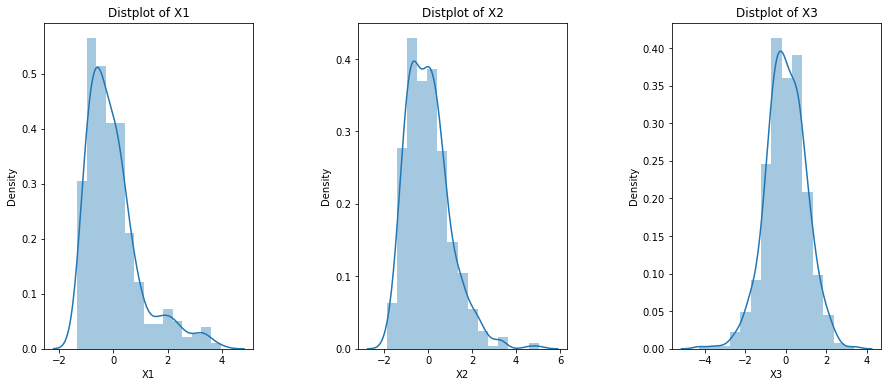

In [21]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['X1' , 'X2' , 'X3']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(tfmdata[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [9]:
datatransform = tfmdata.iloc[:, 1:11]
print(datatransform)

           X1        X2        X3        X4        X5        X6        X7  \
0    0.900074 -1.374671  1.327477  0.357202  0.391671  0.760748  0.538129   
1    1.085273 -0.616930  0.360770  0.356318  0.367145  0.457979  1.114206   
2    0.121701 -0.946167  1.353861 -0.123885  0.442164  0.760748  0.840467   
3    0.152568 -0.976774 -0.470852  1.438764  0.446492  0.760748 -0.026712   
4    0.292138 -1.005727  0.997151  0.239583  0.374359  0.760748  1.041685   
..        ...       ...       ...       ...       ...       ...       ...   
509  3.219087  4.602887 -3.651699 -1.860751 -7.597831 -4.792661 -3.469892   
510  2.219281  3.253676 -2.160479 -1.667962 -5.627145 -3.432196 -2.555728   
511  3.943779  3.307446 -3.146183 -0.899461 -4.174377 -2.429275 -0.377056   
512  3.800183  3.289247 -2.484473 -1.433609 -1.143329 -0.336788 -0.354585   
513 -0.118521 -1.055361 -1.949407  2.761753  0.093038  0.516740  1.955849   

           X8        X9       X10  
0    0.390332 -1.235176  0.382257  
1  

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(datatransform)

KMeans(n_clusters=5, random_state=0)

In [11]:
labels_sample5 = kmeans.labels_
tfmdata['label2'] = labels_sample5

In [12]:
tfmdata

,Label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,label2
0,Simeulue,0.900074,-1.374671,1.327477,0.357202,0.391671,0.760748,0.538129,0.390332,-1.235176,0.382257,0
1,Aceh Singkil,1.085273,-0.616930,0.360770,0.356318,0.367145,0.457979,1.114206,-1.022389,0.566470,0.981444,2
2,Aceh Selatan,0.121701,-0.946167,1.353861,-0.123885,0.442164,0.760748,0.840467,-0.555913,0.060972,0.524656,2
3,Aceh Tenggara,0.152568,-0.976774,-0.470852,1.438764,0.446492,0.760748,-0.026712,-0.116653,0.227311,0.461778,3
4,Aceh Timur,0.292138,-1.005727,0.997151,0.239583,0.374359,0.760748,1.041685,-0.493885,-0.258744,-0.414811,2
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,3.219087,4.602887,-3.651699,-1.860751,-7.597831,-4.792661,-3.469892,3.213875,-1.815202,1.425286,4
510,Dogiyai,2.219281,3.253676,-2.160479,-1.667962,-5.627145,-3.432196,-2.555728,2.651824,-1.822763,-0.919682,4
511,Intan Jaya,3.943779,3.307446,-3.146183,-0.899461,-4.174377,-2.429275,-0.377056,1.225179,-1.692068,1.131241,4
512,Deiyai,3.800183,3.289247,-2.484473,-1.433609,-1.143329,-0.336788,-0.354585,1.233407,-1.729873,0.667055,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

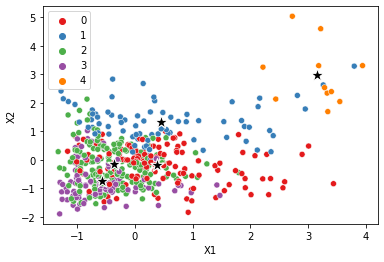

In [13]:
centroids = kmeans.cluster_centers_
sns.scatterplot(tfmdata['X1'],tfmdata['X2'], hue=tfmdata['label2'], palette="Set1")
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='*', s=200)

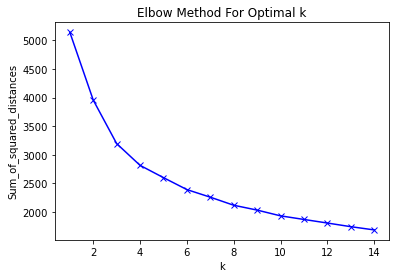

In [22]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(datatransform)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(datatransform)
    centers = km.cluster_centers_

    score = silhouette_score(datatransform, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2133498233482081
For n_clusters = 3, silhouette score is 0.21027058267197052
For n_clusters = 4, silhouette score is 0.17230577925438373
For n_clusters = 5, silhouette score is 0.16365825408823337
For n_clusters = 6, silhouette score is 0.1648211699017502
For n_clusters = 7, silhouette score is 0.16164493018803086
For n_clusters = 8, silhouette score is 0.16231352966748436
For n_clusters = 9, silhouette score is 0.15639960770373312
For n_clusters = 10, silhouette score is 0.15573415463176696
For n_clusters = 11, silhouette score is 0.15334882040317502
For n_clusters = 12, silhouette score is 0.15617053638095585
For n_clusters = 13, silhouette score is 0.1505659976636937
For n_clusters = 14, silhouette score is 0.14813528476569818
For n_clusters = 15, silhouette score is 0.1456153775506237
For n_clusters = 16, silhouette score is 0.14012066841010318
For n_clusters = 17, silhouette score is 0.140315605593531
For n_clusters = 18, silhouette score 

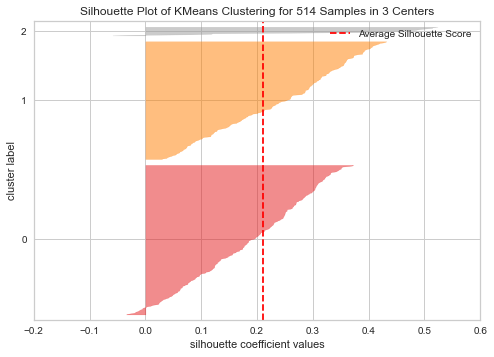

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 514 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(datatransform) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

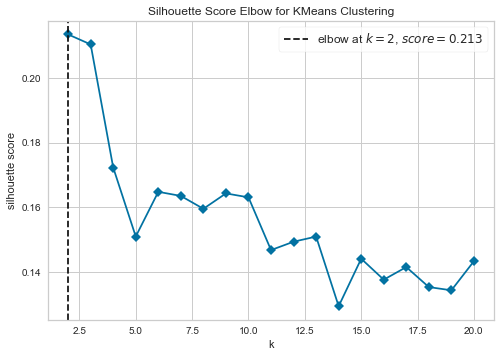

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = KElbowVisualizer(
    km, k=(2,21),metric ='silhouette', timings=False
)

visualizer.fit(datatransform) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [28]:
X1 = datatransform[['X1' , 'X2','X3','X4','X5','X6','X7','X8','X9','X10']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

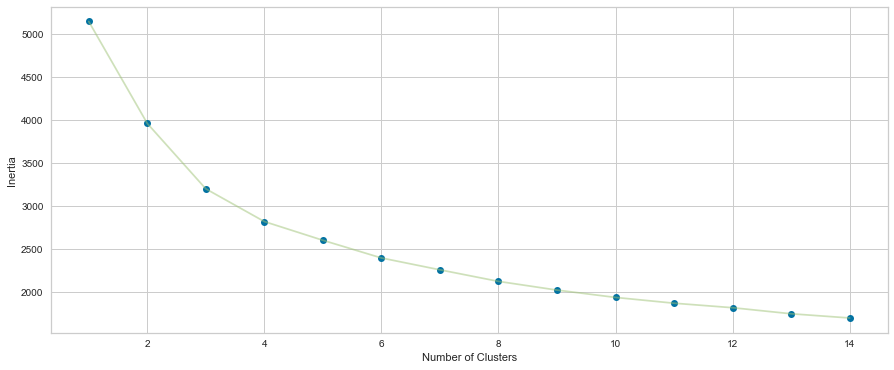

In [29]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

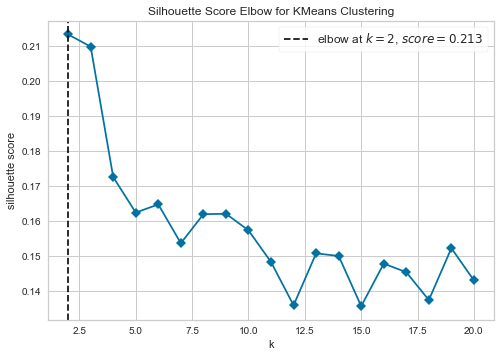

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = KElbowVisualizer(
    km, k=(2,21),metric ='silhouette', timings=False
)

visualizer.fit(X1) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [32]:
X1

array([[ 0.90007363, -1.37467144,  1.32747739, ...,  0.39033155,
        -1.23517595,  0.38225651],
       [ 1.08527263, -0.6169295 ,  0.36077002, ..., -1.02238934,
         0.56647018,  0.98144395],
       [ 0.12170101, -0.94616672,  1.35386132, ..., -0.55591295,
         0.06097235,  0.524656  ],
       ...,
       [ 3.94377898,  3.30744577, -3.14618257, ...,  1.22517872,
        -1.69206822,  1.13124081],
       [ 3.80018266,  3.28924673, -2.48447349, ...,  1.23340693,
        -1.72987255,  0.66705548],
       [-0.11852089, -1.05536097, -1.94940729, ..., -1.41291299,
         0.3428846 , -2.30114154]])

In [33]:
km_sample = KMeans(n_clusters=3)
km_sample.fit(X1)

KMeans(n_clusters=3)

In [34]:
labels_sample = km_sample.labels_

In [35]:
indonesia['cluster'] = labels_sample

In [37]:
tfmdata['cluster'] = labels_sample

In [36]:
indonesia

,Kota/Kabupaten,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,cluster
0,Simeulue,18.98,6.37,65.35,28.28,99.62,100.00,47.67,46.89,5.44,65.47,0
1,Aceh Singkil,20.36,15.53,56.19,28.27,99.45,96.96,53.31,24.57,22.12,68.71,1
2,Aceh Selatan,13.18,11.55,65.60,22.84,99.97,100.00,50.63,31.94,17.44,66.24,1
3,Aceh Tenggara,13.41,11.18,48.31,40.51,100.00,100.00,42.14,38.88,18.98,65.90,1
4,Aceh Timur,14.45,10.83,62.22,26.95,99.50,100.00,52.60,32.92,14.48,61.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,36.26,78.63,18.17,3.20,44.24,44.24,8.43,91.50,0.07,71.11,2
510,Dogiyai,28.81,62.32,32.30,5.38,57.90,57.90,17.38,82.62,0.00,58.43,2
511,Intan Jaya,41.66,62.97,22.96,14.07,67.97,67.97,38.71,60.08,1.21,69.52,2
512,Deiyai,40.59,62.75,29.23,8.03,88.98,88.98,38.93,60.21,0.86,67.01,2


In [38]:
tfmdata

,Label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,label2,cluster
0,Simeulue,0.900074,-1.374671,1.327477,0.357202,0.391671,0.760748,0.538129,0.390332,-1.235176,0.382257,0,0
1,Aceh Singkil,1.085273,-0.616930,0.360770,0.356318,0.367145,0.457979,1.114206,-1.022389,0.566470,0.981444,2,1
2,Aceh Selatan,0.121701,-0.946167,1.353861,-0.123885,0.442164,0.760748,0.840467,-0.555913,0.060972,0.524656,2,1
3,Aceh Tenggara,0.152568,-0.976774,-0.470852,1.438764,0.446492,0.760748,-0.026712,-0.116653,0.227311,0.461778,3,1
4,Aceh Timur,0.292138,-1.005727,0.997151,0.239583,0.374359,0.760748,1.041685,-0.493885,-0.258744,-0.414811,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,3.219087,4.602887,-3.651699,-1.860751,-7.597831,-4.792661,-3.469892,3.213875,-1.815202,1.425286,4,2
510,Dogiyai,2.219281,3.253676,-2.160479,-1.667962,-5.627145,-3.432196,-2.555728,2.651824,-1.822763,-0.919682,4,2
511,Intan Jaya,3.943779,3.307446,-3.146183,-0.899461,-4.174377,-2.429275,-0.377056,1.225179,-1.692068,1.131241,4,2
512,Deiyai,3.800183,3.289247,-2.484473,-1.433609,-1.143329,-0.336788,-0.354585,1.233407,-1.729873,0.667055,1,2


<AxesSubplot:xlabel='X1', ylabel='X2'>

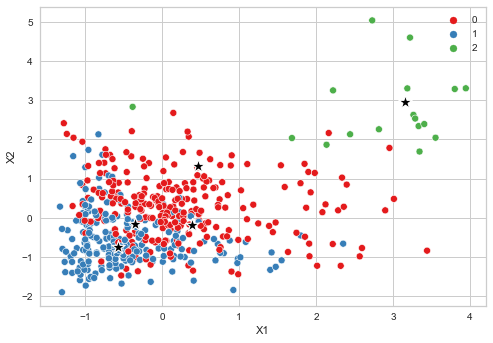

In [39]:
entroids = km_sample.cluster_centers_
sns.scatterplot(tfmdata['X1'],tfmdata['X2'], hue=tfmdata['cluster'], palette="Set1")
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='*', s=200)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(tfmdata['cluster'],labels_sample))
print(classification_report(tfmdata['cluster'],labels_sample))

[[275   0   0]
 [  0 222   0]
 [  0   0  17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00        17

    accuracy                           1.00       514
   macro avg       1.00      1.00      1.00       514
weighted avg       1.00      1.00      1.00       514



In [41]:
tfmdata.to_excel('transformasihasilcluster.xlsx', index=False)

In [42]:
indonesia.to_excel('dataaslicluster.xlsx', index=False)